# Perceptron
## (Artificial Neuron):-
    => A Percepton is single layer neural network.
    => It acts a Linear Classifier, Binary Classification
    => Loss Function: Binary Cross Entropy
        (-ve of Log likelihood)
    => Optimisation: Gradient Descent/Stochastic Gradient Descent


# Learning Goals
    => How to implement Peceptron?
    => Understanding Vectorization,
       writing efficient Code, without using for loop!
    => What is the meaning of "Linear Classifier"?

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs,make_moons

## Generating Data

In [43]:
X,Y = make_blobs?#seeing documentation

In [44]:
X,Y = make_blobs(n_samples=500,centers=2,n_features=2,random_state=1)
print(X.shape,Y.shape)

(500, 2) (500,)


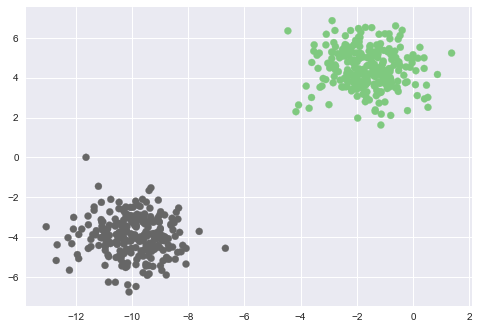

In [45]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap = plt.cm.Accent)
plt.show()

## Model and Helper functions

In [46]:
def sigmoid(z):
    return (1.0)/(1+np.exp(-z))

### Implement Perceptorn Learning Algorithm
- Learn the weights
- Reduce the loss
- Make the Predictions

In [47]:
def predict(X,weights):
    """ X -> mx(n+1) matrix, w-->(nX1,) vector """
    z = np.dot(X,weights)
    predictions = sigmoid(z)
    return predictions

def loss(X,Y,weights):
    """Binary Cross Entropy"""
    Y_ = predict(X,weights)
    cost = np.mean(-Y*np.log(Y_)-(1-Y)*np.log(1-Y_))
    return cost

def update(X,Y,weights,learning_rate):
    """Perform weight updates for 1 epoch"""
    Y_ = predict(X,weights)
    dw = np.dot(X.T,Y_- Y)
    
    m = X.shape[0]
    weights = weights - learning_rate*dw/(float(m))
    return weights
      
def train(X,Y,learning_rate=0.5,maxEpochs=100):
    
    # Modify the input to handle the bias term
    ones = np.ones((X.shape[0],1))
    X = np.hstack((ones,X))
    
    # Init Weights 0
    weights = np.zeros(X.shape[1])
    
    # Iterate over all epochs and make updates
    
    for epoch in range(maxEpochs):
        weights = update(X,Y,weights,learning_rate)
        
        if epoch%10==0:
            l = loss(X,Y,weights)
            print("Epoch %d Loss %.4f"%(epoch,l))
            
    return weights
    

In [48]:
weights = train(X,Y,learning_rate=0.5,maxEpochs=500)

Epoch 0 Loss 0.0566
Epoch 10 Loss 0.0110
Epoch 20 Loss 0.0061
Epoch 30 Loss 0.0042
Epoch 40 Loss 0.0033
Epoch 50 Loss 0.0027
Epoch 60 Loss 0.0023
Epoch 70 Loss 0.0020
Epoch 80 Loss 0.0017
Epoch 90 Loss 0.0016
Epoch 100 Loss 0.0014
Epoch 110 Loss 0.0013
Epoch 120 Loss 0.0012
Epoch 130 Loss 0.0012
Epoch 140 Loss 0.0011
Epoch 150 Loss 0.0010
Epoch 160 Loss 0.0010
Epoch 170 Loss 0.0009
Epoch 180 Loss 0.0009
Epoch 190 Loss 0.0009
Epoch 200 Loss 0.0008
Epoch 210 Loss 0.0008
Epoch 220 Loss 0.0008
Epoch 230 Loss 0.0008
Epoch 240 Loss 0.0007
Epoch 250 Loss 0.0007
Epoch 260 Loss 0.0007
Epoch 270 Loss 0.0007
Epoch 280 Loss 0.0007
Epoch 290 Loss 0.0007
Epoch 300 Loss 0.0006
Epoch 310 Loss 0.0006
Epoch 320 Loss 0.0006
Epoch 330 Loss 0.0006
Epoch 340 Loss 0.0006
Epoch 350 Loss 0.0006
Epoch 360 Loss 0.0006
Epoch 370 Loss 0.0006
Epoch 380 Loss 0.0006
Epoch 390 Loss 0.0005
Epoch 400 Loss 0.0005
Epoch 410 Loss 0.0005
Epoch 420 Loss 0.0005
Epoch 430 Loss 0.0005
Epoch 440 Loss 0.0005
Epoch 450 Loss 0.0005

### Perceptron Implementation - Part-II
- Make Prediction
- Visualize Decision Surface
- Linear vs Non-linear classification

In [50]:
def getPrediction(X_Test,weights,labels=True):
    if X_Test.shape[1]!=weights.shape[0]:
        ones = np.ones((X_Test.shape[0],1))
        X_Test = np.hstack((ones,X_Test))
        
    probs = predict(X_Test,weights)
    
    if not labels:
        return probs
    else:
        labels = np.zeros(probs.shape)
        labels[probs>=0.5] = 1
        return labels
    
    

In [51]:
x1 = np.linspace(-12,10,10)
print(x1)

x2 = -(weights[0] + weights[1]*x1)/weights[2]

[-12.          -9.55555556  -7.11111111  -4.66666667  -2.22222222
   0.22222222   2.66666667   5.11111111   7.55555556  10.        ]


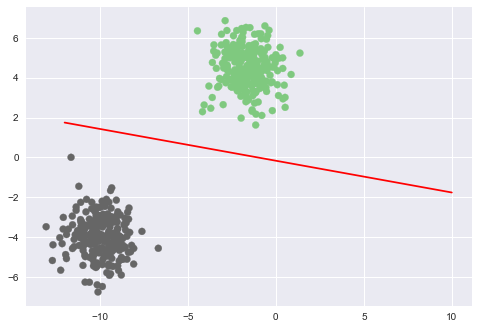

In [52]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.plot(x1,x2,c='red')
plt.show()

In [53]:
# Find the accuracy!!
Y_ = getPrediction(X,weights,labels=True)
training_acc = np.sum(Y_==Y)/Y.shape[0]
print(training_acc)

1.0


In [55]:
# checking our algorithm on different dataset which is linearly inseperable
X,Y = make_moons(n_samples=1000,shuffle=True,noise=0.2,random_state=1)

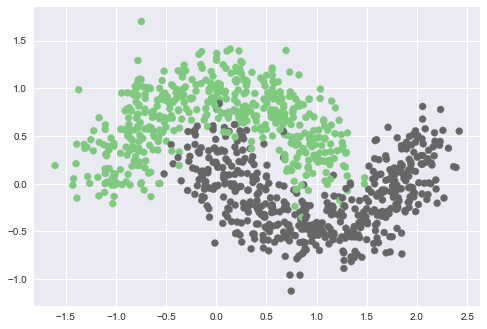

In [56]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap = plt.cm.Accent)
plt.show()

In [57]:
weights = train(X,Y,learning_rate=0.5,maxEpochs=500)

Epoch 0 Loss 0.6481
Epoch 10 Loss 0.4575
Epoch 20 Loss 0.4005
Epoch 30 Loss 0.3729
Epoch 40 Loss 0.3562
Epoch 50 Loss 0.3447
Epoch 60 Loss 0.3362
Epoch 70 Loss 0.3296
Epoch 80 Loss 0.3244
Epoch 90 Loss 0.3201
Epoch 100 Loss 0.3166
Epoch 110 Loss 0.3136
Epoch 120 Loss 0.3111
Epoch 130 Loss 0.3090
Epoch 140 Loss 0.3072
Epoch 150 Loss 0.3056
Epoch 160 Loss 0.3042
Epoch 170 Loss 0.3031
Epoch 180 Loss 0.3020
Epoch 190 Loss 0.3011
Epoch 200 Loss 0.3004
Epoch 210 Loss 0.2997
Epoch 220 Loss 0.2991
Epoch 230 Loss 0.2985
Epoch 240 Loss 0.2980
Epoch 250 Loss 0.2976
Epoch 260 Loss 0.2972
Epoch 270 Loss 0.2969
Epoch 280 Loss 0.2966
Epoch 290 Loss 0.2963
Epoch 300 Loss 0.2960
Epoch 310 Loss 0.2958
Epoch 320 Loss 0.2956
Epoch 330 Loss 0.2954
Epoch 340 Loss 0.2953
Epoch 350 Loss 0.2951
Epoch 360 Loss 0.2950
Epoch 370 Loss 0.2949
Epoch 380 Loss 0.2948
Epoch 390 Loss 0.2947
Epoch 400 Loss 0.2946
Epoch 410 Loss 0.2945
Epoch 420 Loss 0.2944
Epoch 430 Loss 0.2943
Epoch 440 Loss 0.2943
Epoch 450 Loss 0.2942

In [60]:
x1 = np.linspace(-2,2,10)
print(x1)

x2 = -(weights[0] + weights[1]*x1)/weights[2]

[-2.         -1.55555556 -1.11111111 -0.66666667 -0.22222222  0.22222222
  0.66666667  1.11111111  1.55555556  2.        ]


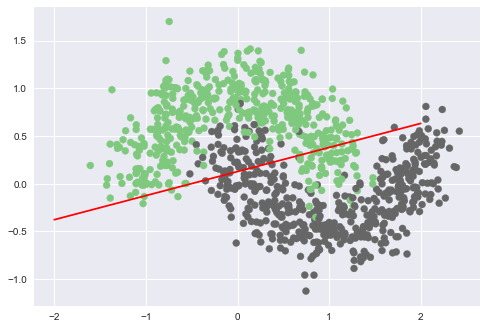

In [61]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.plot(x1,x2,c='red')
plt.show()

In [62]:
# so we can see that our Perceptron doesn't predict good boundry
# Find the accuracy!!
Y_ = getPrediction(X,weights,labels=True)
training_acc = np.sum(Y_==Y)/Y.shape[0]
print(training_acc)

0.868


# Deep Learning Basics

# MultiLayer Perceptron/Feed Forward Architecture
## Implementing a 3 Layer Neural Network from scratch

## Learning Goals(Theory + Implementation)
- Understand the Multilayer Perceptron(MLP) Architecture
- Understanding Forward Propagation and Backpropagation, Loss and Activation Fn's
- Making Predictions
- Checking classification performance on different datasets
- Classification Project

# Part -1 Neural Architecture
 ### 1 Layer Network
- Simplest unit Perceptron
- Onle one output unit
- No hidden units
- Input is not counted in layers
### 2 Layer Network
- Two layers 1 Hidden + 1 Output
- Multi-layer perceptron or feed forward net or deep forward net
### 3 Layer Network
- Three layers 2 Hidden + 1 output
- Multi-layer perceptron/feed forward net/deep forward net

# Part-2 Understanding Forward Propagation
- How to pass one example?
- How to pass multiple examples(Vectorization)?
- Writing the code

In [63]:
import numpy as np

In [64]:
# Model Parameters
input_size = 3 # no_of_features
layers = [4,3] # no of neurons in 1st and 2nd layer
output_size = 2

In [65]:
def softmax(a):
    e_pa = np.exp(a)
    ans = e_pa/np.sum(e_pa,axis=1,keepdims=True) #keepdims preserves the earlier shapes of a
    return ans

a = np.array([[10,10],[20,30]])
softmax(a)

array([[5.00000000e-01, 5.00000000e-01],
       [4.53978687e-05, 9.99954602e-01]])

In [ ]:
"""class NeuralNetwork:
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        
        model = {} # Dictionary
        
        # First Layer
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        
        # Second Layer
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros(1,layers[1])
        
        # Third/Output Layer
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model 
        

    def forward(self,x):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1) # tanh is activation function,sigmoid produces only positive values, hence we are using tanh
        
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3) """

        

## Part 3
# Backpropagation Algorithm!
- One of the most difficult/trikiest things in ML to get right
- Why do we need this?
- Quite Mathematicla, challenging to understand
- Good thing - As a deep learning engineer, you never have to implement backpropagation from scratch...
## But we are going to build it from scratch:D!!

In [66]:
class NeuralNetwork:
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        
        model = {} # Dictionary
        activation_outputs = () # tuple
        # First Layer
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        
        # Second Layer
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        # Third/Output Layer
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model 
        

    def forward(self,x):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1) # tanh is activation function,sigmoid produces only positive values, hence we are using tanh
        
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        self.activation_outputs = (a1,a2,y_)
        return y_
    
    def backward(self,x,y,learning_rate=0.001):
        #Model parameters
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        a1,a2,y_ = self.activation_outputs
        m = x.shape[0]
        
        delta3 = y_ - y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)/float(m)
         
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T) # derivative activation function tanh        
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)/float(m)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)/float(m)
        
        # Update the model parameters using Gradient Descent
        
        self.model["W1"] -= learning_rate*dw1
        self.model["b1"] -= learning_rate*db1
        
        self.model["W2"] -= learning_rate*dw2
        self.model["b2"] -= learning_rate*db2
        
        self.model["W3"] -= learning_rate*dw3
        self.model["b3"] -= learning_rate*db3
        
        # :)
        
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        print("W1",W1.shape)
        print("A1",a1.shape)
        
        print("W2",W2.shape)
        print("A2",a2.shape)
        
        print("W3",W3.shape)
        print("Y_",y_.shape)
        
        
        

In [67]:
# Categorical loss entropy function
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l
def one_hot(y,depth):
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
    
    return y_oht
    

#### Test our code:-

In [86]:
## Generate Dataset
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [87]:
X,Y = make_circles(n_samples=500,shuffle=True,noise=.2,random_state=1,factor=0.2)

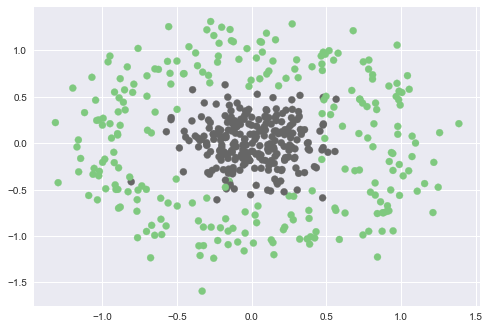

In [88]:
# Visualize dataset
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

### Training Our Model

In [89]:
# Model classifier
model = NeuralNetwork(input_size=2,layers=[10,5],output_size=2)

In [95]:
model.summary()

W1 (2, 10)
A1 (500, 10)
W2 (10, 5)
A2 (500, 5)
W3 (5, 2)
Y_ (500, 2)


In [96]:
model.forward(X.shape)

array([[0.02646728, 0.97353272]])

In [97]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss = []
    
    classes = 2
    Y_OHT = one_hot(Y,classes)
    
    for ix in range(epochs):
        
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        training_loss.append(l)
        model.backward(X,Y_OHT,learning_rate)
        
        if(logs):
            print("Epoch %d Loss %.4f"%(ix,l))
            
            
    return training_loss

In [102]:
losses = train(X,Y,model,500,0.001)

Epoch 0 Loss 0.0472
Epoch 1 Loss 0.0471
Epoch 2 Loss 0.0471
Epoch 3 Loss 0.0471
Epoch 4 Loss 0.0470
Epoch 5 Loss 0.0470
Epoch 6 Loss 0.0470
Epoch 7 Loss 0.0470
Epoch 8 Loss 0.0469
Epoch 9 Loss 0.0469
Epoch 10 Loss 0.0469
Epoch 11 Loss 0.0469
Epoch 12 Loss 0.0468
Epoch 13 Loss 0.0468
Epoch 14 Loss 0.0468
Epoch 15 Loss 0.0468
Epoch 16 Loss 0.0467
Epoch 17 Loss 0.0467
Epoch 18 Loss 0.0467
Epoch 19 Loss 0.0466
Epoch 20 Loss 0.0466
Epoch 21 Loss 0.0466
Epoch 22 Loss 0.0466
Epoch 23 Loss 0.0465
Epoch 24 Loss 0.0465
Epoch 25 Loss 0.0465
Epoch 26 Loss 0.0465
Epoch 27 Loss 0.0464
Epoch 28 Loss 0.0464
Epoch 29 Loss 0.0464
Epoch 30 Loss 0.0464
Epoch 31 Loss 0.0464
Epoch 32 Loss 0.0463
Epoch 33 Loss 0.0463
Epoch 34 Loss 0.0463
Epoch 35 Loss 0.0463
Epoch 36 Loss 0.0462
Epoch 37 Loss 0.0462
Epoch 38 Loss 0.0462
Epoch 39 Loss 0.0462
Epoch 40 Loss 0.0461
Epoch 41 Loss 0.0461
Epoch 42 Loss 0.0461
Epoch 43 Loss 0.0461
Epoch 44 Loss 0.0460
Epoch 45 Loss 0.0460
Epoch 46 Loss 0.0460
Epoch 47 Loss 0.0460
Ep

Epoch 491 Loss 0.0452
Epoch 492 Loss 0.0457
Epoch 493 Loss 0.0451
Epoch 494 Loss 0.0457
Epoch 495 Loss 0.0451
Epoch 496 Loss 0.0457
Epoch 497 Loss 0.0451
Epoch 498 Loss 0.0456
Epoch 499 Loss 0.0450


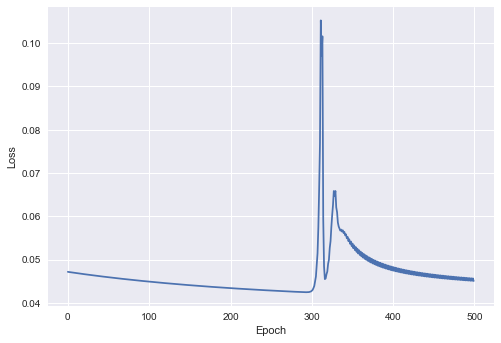

In [103]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

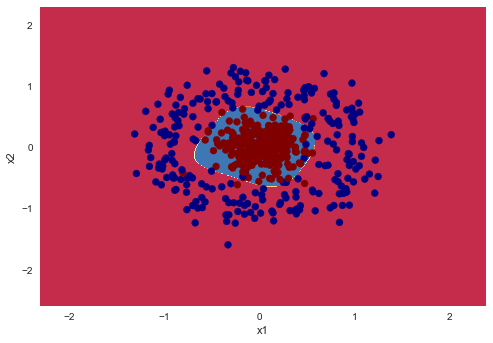

In [100]:
## Find Accuracy
#from visualize import plot_decision_boundary
plot_decision_boundary(lambda x:model.predict(x),X,Y)

In [101]:
outputs = model.predict(X)
training_accuracy = np.sum(outputs==Y)/Y.shape[0]
print("Training Accuracy %.4f:"%(training_accuracy*100))

Training Accuracy 96.8000:


## Testing on other non-linear datasets

In [104]:
model = NeuralNetwork(input_size=2,layers=[10,5],output_size=2)

#### XOR Dataset

In [105]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([0,1,1,0])

In [112]:
losses = train(X,Y,model,100,0.1)

Epoch 0 Loss 0.0902
Epoch 1 Loss 0.0815
Epoch 2 Loss 0.0740
Epoch 3 Loss 0.0675
Epoch 4 Loss 0.0619
Epoch 5 Loss 0.0570
Epoch 6 Loss 0.0527
Epoch 7 Loss 0.0489
Epoch 8 Loss 0.0456
Epoch 9 Loss 0.0426
Epoch 10 Loss 0.0400
Epoch 11 Loss 0.0376
Epoch 12 Loss 0.0355
Epoch 13 Loss 0.0336
Epoch 14 Loss 0.0319
Epoch 15 Loss 0.0303
Epoch 16 Loss 0.0288
Epoch 17 Loss 0.0275
Epoch 18 Loss 0.0263
Epoch 19 Loss 0.0252
Epoch 20 Loss 0.0242
Epoch 21 Loss 0.0232
Epoch 22 Loss 0.0223
Epoch 23 Loss 0.0215
Epoch 24 Loss 0.0207
Epoch 25 Loss 0.0200
Epoch 26 Loss 0.0194
Epoch 27 Loss 0.0187
Epoch 28 Loss 0.0181
Epoch 29 Loss 0.0176
Epoch 30 Loss 0.0171
Epoch 31 Loss 0.0166
Epoch 32 Loss 0.0161
Epoch 33 Loss 0.0156
Epoch 34 Loss 0.0152
Epoch 35 Loss 0.0148
Epoch 36 Loss 0.0144
Epoch 37 Loss 0.0141
Epoch 38 Loss 0.0137
Epoch 39 Loss 0.0134
Epoch 40 Loss 0.0131
Epoch 41 Loss 0.0128
Epoch 42 Loss 0.0125
Epoch 43 Loss 0.0122
Epoch 44 Loss 0.0120
Epoch 45 Loss 0.0117
Epoch 46 Loss 0.0115
Epoch 47 Loss 0.0112
Ep

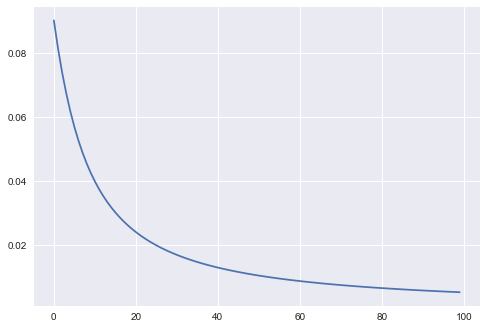

In [113]:
plt.plot(losses)

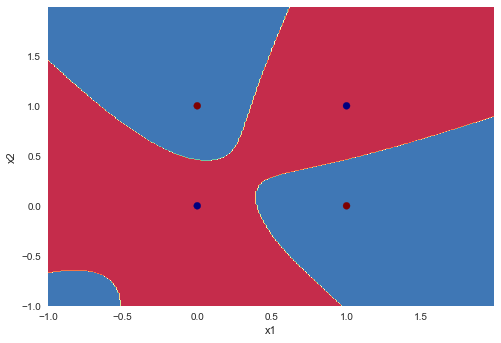

In [114]:
plot_decision_boundary(lambda x:model.predict(x),X,Y)

In [115]:
outputs = model.predict(X)
training_accuracy = np.sum(outputs==Y)/Y.shape[0]
print("Training Accuracy %.4f:"%(training_accuracy*100))

Training Accuracy 100.0000:


### Other Datasets
- checking our model on different datasets

In [117]:
from sklearn.datasets import make_moons,make_circles,make_classification

In [118]:
def load_dataset(dataset):
    if dataset=='moons':
        X,Y = make_moons(n_samples=500,noise=0.2,random_state=1) # used during Perceptron learning
    elif dataset=='circles':
        X,Y = make_circles(n_samples=500,shuffle=True,noise=0.2,random_state=1,factor=0.2)
    elif dataset=='classification':
        X,Y = make_classification(n_samples=500,n_classes=2,n_features=2,n_informative=2,n_redundant=0,random_state=1)
    else:
        # Create XOR Dataset
        X = np.array([
            [0,0],
            [0,1],
            [1,0],
            [1,1]
        ])
        Y = np.array([0,1,1,0])
    return X,Y

Training ACC 1.0000


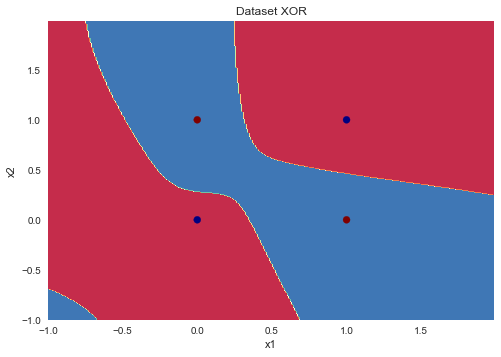

Training ACC 0.9540


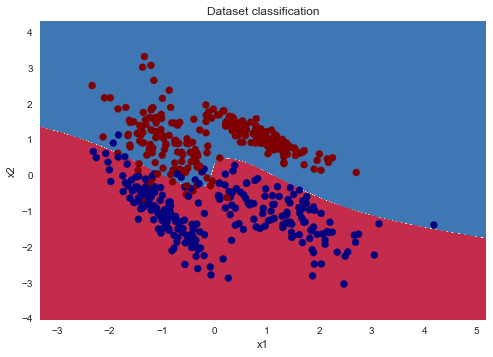

Training ACC 0.9540


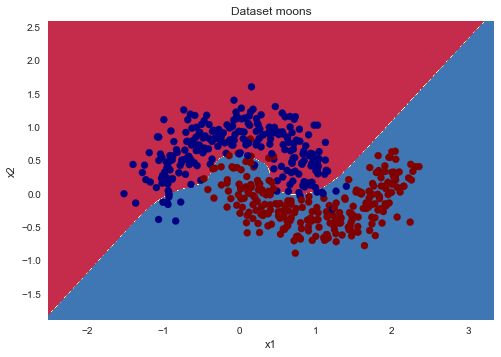

Training ACC 0.9640


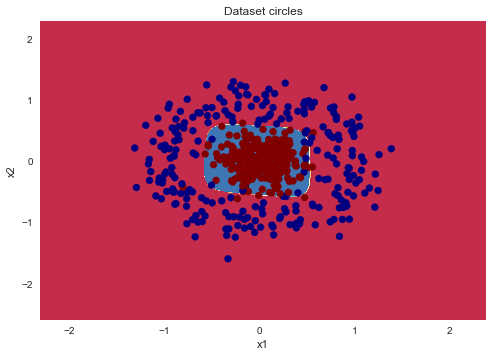

In [122]:
datasets = ["XOR","classification","moons","circles"]

for d in datasets:
    model = NeuralNetwork(input_size=2,layers=[8,4],output_size=2)
    X,Y = load_dataset(d)
    train(X,Y,model,1000,0.001,logs=False)
    outputs = model.predict(X)
    
    training_accuracy = np.sum(outputs==Y)/Y.shape[0]
    print("Training ACC %.4f"%training_accuracy)
    
    plt.title("Dataset "+d)
    plot_decision_boundary(lambda x:model.predict(x),X,Y)
    plt.show()
    

In [33]:
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(model, X, y,cmap=plt.cm.jet):
    """
    Given a model(a function) and a set of points(X), corresponding labels(y), scatter the points in X with color coding
    according to y. Also use the model to predict the label at grid points to get the region for each label, and thus the 
    descion boundary.
    Example usage:
    say we have a function predict(x,other params) which makes 0/1 prediction for point x and we want to plot
    train set then call as:
    plot_decision_boundary(lambda x:predict(x,other params),X_train,Y_train)
    params(3): 
        model : a function which expectes the point to make 0/1 label prediction
        X : a (mx2) numpy array with the points
        y : a (mx1) numpy array with labels
    outputs(None)
    """
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.style.use("seaborn")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.jet)
    
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Building a Pokemon Classifier

# Image Classification using Neural Network
#### Poke'Mon Dataset From Kaggle!
- Dataset has multiple image of each pokemon!
- Dataset Created by - Harshit Dwivedi(Mentor CB)

In [3]:
# complete this project later on
# solve tensorflow issue
import os
from pathlib import Path
import numpy as np
#from keras.preprocessing import image
import cv2
import matplotlib.pyplot as plt

#### Data Preparation

In [4]:
p = Path("./dataset/")

dirs = p.glob("*")

image_data = []
labels = []
label_dict = {"Pikachu":0,"Bulbasaur":1,"Meowth":2}
label2pokemon = {0:"Pikachu",1:"Bulbasaur",2:"Meowth"}
# Optional
image_paths = []
for folder_dir in dirs:
    label = str(folder_dir).split("\\")[-1]
    print(label)
    #print(folder_dir)
    cnt = 0
    print(folder_dir)
    # Iterate over folder_dir and pick all images of the pokemon
    for img_path in folder_dir.glob("*.jpg"):
        #img = image.load_img(img_path,target_size=(100,100))
        #img_array = image.img_to_array(img)
        img = cv2.imread(str(img_path),1)
        img = cv2.resize(img,(100,100))
        img_array = np.array(img)
        image_data.append(img_array)
    
        labels.append(label_dict[label])
        cnt+=1
    
    print(cnt)

Bulbasaur
dataset\Bulbasaur
176
Meowth
dataset\Meowth
70
Pikachu
dataset\Pikachu
199


## Visualisation

In [25]:
import numpy as np

In [5]:
print(len(image_data))
print(len(labels))

445
445


In [8]:
X =  np.array(image_data)
Y = np.array(labels)
X = X/255.0 # Normalisation in case of Keras 
print(X.shape)
print(Y.shape)

(445, 100, 100, 3)
(445,)


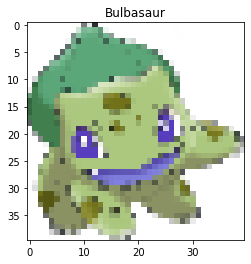

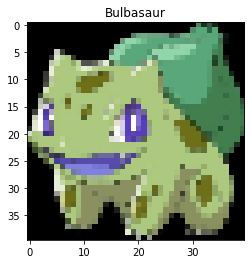

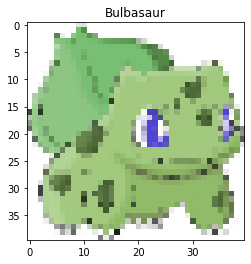

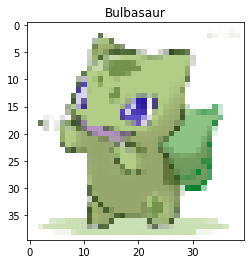

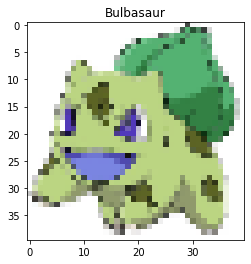

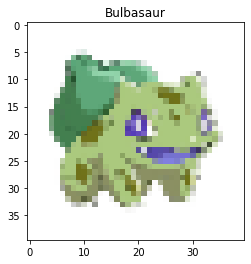

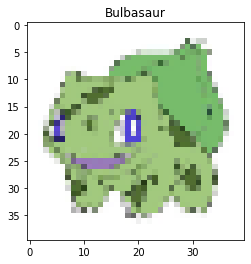

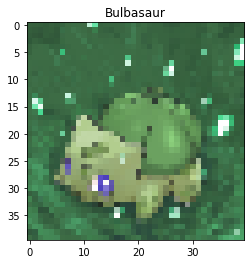

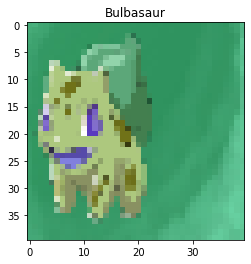

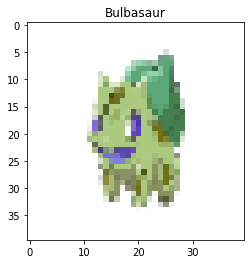

In [12]:
# Draw some Pokemons
def drawImg(img,label):
    plt.title(label2pokemon[label])
    plt.imshow(img)
    plt.show()
for i in range(10):
    r = np.random.randint(400)
    #drawImg(X[r],Y[r])
    drawImg(cv2.resize(X[i],(40,40)),Y[i])

In [13]:
### Create Training and Testing Set:-

split = int(X.shape[0]*.8)

X_ = np.array(X)
Y_ = np.array(Y)

# Training Set
X = X_[:split:,:]
Y = Y_[:split]

# Testing Set
XTest = X_[split:,:]
YTest = Y_[split:]

print(X.shape,Y.shape)
print(XTest.shape,YTest.shape)




(356, 100, 100, 3) (356,)
(89, 100, 100, 3) (89,)


In [ ]:
# complete the neural network part